### Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier

### Classificação

In [337]:
df = pd.read_csv('breast-cancer.data', header=None)
dfc = df.copy() 


In [338]:
for i in dfc.columns:
    dfc[i] = LabelEncoder().fit_transform(dfc[i])

In [339]:
dfc = dfc.sample(frac = 1)

#### Extraindo o target

In [340]:
target = dfc.iloc[:,0]
X = dfc.iloc[:,1:]

In [341]:
X

,1,2,3,4,5,6,7,8,9
168,3,2,1,0,1,1,1,3,0
18,4,0,5,0,1,2,0,2,0
58,4,0,5,0,1,0,0,3,0
119,4,0,2,0,1,0,0,4,0
257,2,2,3,4,2,1,0,2,1
...,...,...,...,...,...,...,...,...,...
35,1,2,5,0,1,1,0,3,0
15,4,1,5,0,1,0,0,2,0
187,4,0,2,0,1,1,0,3,1
61,2,2,1,0,1,0,1,4,0


### Realizando oversampling 

In [342]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# define oversampling strategy
over = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X, target = over.fit_resample(X, target)


#### Utlizando k-fold para validação

In [513]:
kf = KFold(n_splits=3)

In [514]:
dfc

,0,1,2,3,4,5,6,7,8,9
168,0,3,2,1,0,1,1,1,3,0
18,0,4,0,5,0,1,2,0,2,0
58,0,4,0,5,0,1,0,0,3,0
119,0,4,0,2,0,1,0,0,4,0
257,1,2,2,3,4,2,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...
35,0,1,2,5,0,1,1,0,3,0
15,0,4,1,5,0,1,0,0,2,0
187,0,4,0,2,0,1,1,0,3,1
61,0,2,2,1,0,1,0,1,4,0


### Aplicando a Regressão Logística

In [532]:
model = LogisticRegression(solver='lbfgs', random_state=0)

In [533]:
scores = cross_val_score(model, X, target, scoring='accuracy', cv=kf)
print('Accuracy: {média: %.3f desvio padrão: (%.3f})' % (mean(scores), std(scores)))

Accuracy: {média: 0.597 desvio padrão: (0.037})


In [534]:
scores = cross_val_score(model, X, target, scoring='precision', cv=kf)
print('precision: {média: %.3f desvio padrão: (%.3f})' % (mean(scores), std(scores)))

precision: {média: 0.604 desvio padrão: (0.250})


In [536]:
scores = cross_val_score(model, X, target, scoring='f1', cv=kf)
print('f1: {média: %.3f desvio padrão: (%.3f})' % (mean(scores), std(scores)))

f1: {média: 0.572 desvio padrão: (0.077})


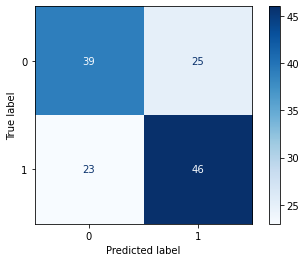

In [517]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.33, random_state=20)
y_train = pd.to_numeric(y_train)
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues) 

### Aplicando o NaiveBayes

In [518]:
clf = CategoricalNB()

In [519]:
scores = cross_val_score(clf, X, target, scoring='accuracy', cv=kf)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.594 (0.093)


In [537]:
scores = cross_val_score(clf, X, target, scoring='precision', cv=kf)
print('precision: %.3f (%.3f)' % (mean(scores), std(scores)))

precision: 0.632 (0.229)


In [538]:
scores = cross_val_score(clf, X, target, scoring='f1', cv=kf)
print('f1: %.3f (%.3f)' % (mean(scores), std(scores)))

f1: 0.594 (0.093)


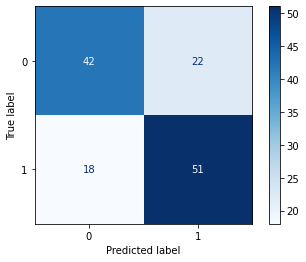

In [520]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.33, random_state=20)
y_train = pd.to_numeric(y_train)
clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues) 

### Aplicando K-Nearst Neighbors

In [521]:
knn = neighbors.KNeighborsClassifier(n_neighbors=2)

In [522]:
scores = cross_val_score(knn, X, target, scoring='accuracy', cv=kf)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.729 (0.060)


In [539]:
scores = cross_val_score(knn, X, target, scoring='precision', cv=kf)
print('precision: %.3f (%.3f)' % (mean(scores), std(scores)))

precision: 0.724 (0.191)


In [540]:
scores = cross_val_score(knn, X, target, scoring='f1', cv=kf)
print('f1: %.3f (%.3f)' % (mean(scores), std(scores)))

f1: 0.675 (0.087)


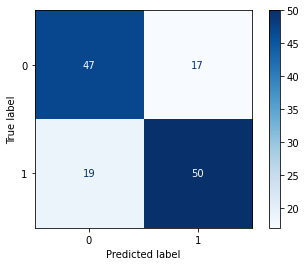

In [542]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.33, random_state=20)
y_train = pd.to_numeric(y_train)
knn.fit(X_train, y_train)
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues) 

### Aplicando Rede Neurais MLP

In [523]:
model = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(20,10), activation = 'tanh', max_iter=4000, tol=1e-3)

In [524]:
scores = cross_val_score(model, X, target, scoring='accuracy', cv=kf)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.739 (0.163)


In [543]:
scores = cross_val_score(model, X, target, scoring='precision', cv=kf)
print('precision: %.3f (%.3f)' % (mean(scores), std(scores)))

precision: 0.604 (0.250)


In [544]:
scores = cross_val_score(model, X, target, scoring='f1', cv=kf)
print('f1: %.3f (%.3f)' % (mean(scores), std(scores)))

f1: 0.572 (0.077)


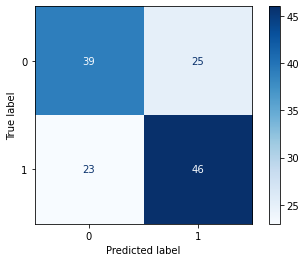

In [547]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.33, random_state=20)
y_train = pd.to_numeric(y_train)
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues) 

### Aplicando Redes Neurais RBF

In [525]:
from sklearn.cluster import KMeans

class RBF:
    def __init__(self, k, lr, n_iter):
        self.k = k 
        self.lr = lr
        self.n_iter = n_iter
        self.w = np.zeros((k, 2))
        self.c = 0
        self.std = 0
        self.bias = np.zeros(2)
        return
    
    def initialization(self):
        self.w = np.zeros((self.k, 2))
        self.c = 0
        self.std = 0
        self.bias = np.zeros(2)
    
    def rbf(self, x, clusters, std):
        y = []
        for c in clusters:
            y.append(np.exp(-np.linalg.norm(x-c))/(2*std**2))
        return y
    
    def fit(self, X, y):
        
        self.initialization()
        
        est = KMeans(n_clusters = self.k, random_state=0).fit(X)
        c = est.cluster_centers_
        n = len(c)
        std = 0
        
        for i in range(n):
            j = i + 1
            while j < n:
                t = np.sum((c[i]-c[j])**2)
                std = max(std, t)
                j = j + 1
                
        std = np.sqrt(std)/np.sqrt(2*n)
        
        self.c = c
        self.std = std
            
        for _ in range(self.n_iter):
            for i in range(X.shape[0]):
                x = X.iloc[i,:]
                h = self.rbf(x, c, std)
         
                target = np.zeros(2, dtype=np.int32)
                target[y.iloc[i]] = 1
                
                out = np.zeros(2)
                for m in range(len(out)):
                    for i in range(len(h)):
                        out[m] += h[i]*self.w[i][m]
                        
                for m in range(len(out)):
                    out[m]+=self.bias[m]
                
                #out = np.exp(out)/np.exp(out).sum()
                
                for m in range(len(out)):
                    for k in range(self.k):
                        self.w[k][m] = self.w[k][m] + self.lr*(target[m]- out[m])*h[k]#*out[m]*(1-out[m])
                
                for m in range(len(out)):
                    self.bias[m] = self.bias[m] + self.lr*(target[m]- out[m])#*out[m]*(1-out[m])
                        
    def pred(self, X):
    
        #for i in range(X.shape[0]):
        #x = X.iloc[0]
        h = self.rbf(X, self.c, self.std)

        out = np.zeros(2)
        
        for m in range(len(out)):
            for i in range(len(h)):
                out[m] += h[i]*self.w[i][m]
            
        for m in range(len(out)):
            out[m]+=self.bias[m]

        #out = np.exp(out)/np.exp(out).sum()
        
        return out


In [552]:
rbfnn = RBF(5, 0.6, 50)

In [573]:
scores = []
precision = []
recall = []

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = target[train_index], target[test_index]

    rbfnn.fit(X_train, y_train)
    
    acertos = 0
    fp = 0
    fn = 0
    vp = 0
    for i in range(X_test.shape[0]):
        y_pred = rbfnn.pred(X_test.iloc[i,:])
        if np.argmax(y_pred) == y_test.iloc[i]:
            acertos += 1
            if np.argmax(y_pred) == 0:
                vp+=1
        if (np.argmax(y_pred) == 1) and (y_test.iloc[i] == 0):
            fp += 1 
        if (np.argmax(y_pred) == 0) and (y_test.iloc[i] == 1):
            fn += 1 
#    print(acertos/y_test.shape[0])
    scores.append(acertos/y_test.shape[0])
    #if vp ==0 and fp == 0:
    #    precision.append(0)
    #else:
    precision.append(vp/(vp+fp))
    #if fn == 0 and vp == 0:
    #recall.append(0)
    #else:
    recall.append(vp/(vp+fn))

In [575]:
fp

0

In [574]:
print('accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

accuracy: 0.501 (0.282)


In [ ]:
print('precision: %.3f (%.3f)' % (mean(precision), std(precision)))

In [ ]:
f1 = []
for i in range(len(recall)):
    f1.append(2*precision[i]*recall[i]/(precision[i]+recall[i]))
print('f1: %.3f (%.3f)' % (mean(f1), std(f1)))

In [568]:
score

1.0

In [570]:
np.argmax(y_pred)

1

### Regressão

In [125]:
df = pd.read_csv('forestfires.csv')
dfc = df.copy() 

In [126]:
dfc

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


#### Convertando atributos categóricos em numéricos (Atributos 'month')

In [100]:
meses = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

In [130]:
for keys in meses.keys():
    for i in range(len(dfc['month'])):
        if dfc['month'].values[i] == keys:
            dfc['month'].values[i] = meses[keys]

In [131]:
dfc

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


#### Convertando atributos categóricos em numéricos (Atributos 'day')

In [193]:
dias = {'sun': 1, 'mon': 2, 'tue': 3, 'wed': 4, 'thu': 5, 'fri': 6, 'sat': 7}
dias

{'sun': 1, 'mon': 2, 'tue': 3, 'wed': 4, 'thu': 5, 'fri': 6, 'sat': 7}

In [194]:
for keys in dias.keys():
    for i in range(len(dfc['day'])):
        if dfc['day'].values[i] == keys:
            dfc['day'].values[i] = dias[keys]

In [189]:
dfc

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


#### Regressão Linear
Será utiliza o atributo temperatura

In [181]:
target = dfc.iloc[:,-1]
x = dfc['temp'].values
x = x.reshape(-1,1)

In [182]:
reg = LinearRegression()

In [183]:
scores = cross_val_score(reg, x, target, scoring='r2', cv=kf)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores

Accuracy: -1.456 (2.861)


array([ 0.        , -7.17780483, -0.04300391, -0.06795602,  0.00739564])

#### Regressão Mutipla Linear

In [190]:
X = dfc.iloc[:,:-1]
X

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,8,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,8,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [191]:
scores = cross_val_score(reg, X, target, scoring='r2', cv=kf)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores

Accuracy: -1.995 (3.732)


array([ 0.        , -9.44980553, -0.04786842, -0.48791711,  0.01095213])